In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-original-films-imdb-scores/NetflixOriginals.csv


In [ ]:
https://www.kaggle.com/code/rushinaik/t-tests-with-example/notebook

# THEORY OF T-TEST 

- The t test tells you how significant the differences between groups are; In other words it lets you know if those differences (measured in means) could have happened by chance.

### Assumptions of t-tests for variables: 
- are independent
- are (approximately) normally distributed.
- have a similar amount of variance within each group being compared (a.k.a. homogeneity of variance)

### Types of t-test : 
1. Groups/Mean are/is comparing from same population sample
2. Two different groups are comparing.

![image](https://www.gstatic.com/education/formulas2/355397047/en/student_s_t_test.svg)

src : https://www.gstatic.com/education/formulas2/355397047/en/student_s_t_test.svg

t	=	Student's t-test

m	=	mean

\mu	=	theoretical value

s	=	standard deviation

{n}	=	variable set size

In [2]:
data = pd.read_csv('/kaggle/input/netflix-original-films-imdb-scores/NetflixOriginals.csv')
data.sample(2)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
443,ReMastered: The Lion's Share,Documentary,"May 17, 2019",84,7.0,English
194,Army of the Dead,Zombie/Heist,"May 21, 2021",148,5.9,English


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt 


<AxesSubplot:xlabel='Runtime', ylabel='Density'>

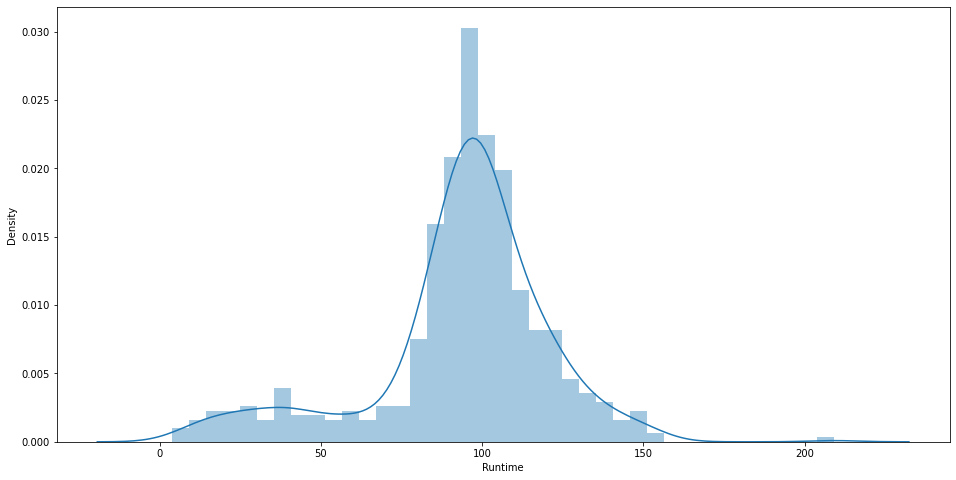

In [4]:
fig, ax = plt.subplots(1,1,figsize=(16, 8))

sns.distplot(data['Runtime'])

In [5]:
# ONE SAMPLE T-TEST
# Null : Hypothesis : The mean of distribution is 7.1
# ALternate Hypothesis : The mean of the dsitribution is not different 


In [6]:
from scipy import stats
print(f"Mean of Runtime {np.mean(data['Runtime'])}")

Mean of Runtime 93.57705479452055


In [7]:
h_null = 91.3
test_result, pval = stats.ttest_1samp(data['Runtime'], h_null)


In [8]:
if pval < 0.05: 
    print(f"WE  reject null hypothesis & Their is difference in mean of the sample distribution and  null hypothesis: {h_null}")
else: 
    print(f"Null hypothesis is true : The mean of distribition is {h_null}")

WE  reject null hypothesis & Their is difference in mean of the sample distribution and  null hypothesis: 91.3


In [9]:
print(test_result, pval)

1.9821390465346165 0.04793278487063802


In [10]:
h_null = 93
test_result, pval = stats.ttest_1samp(data['Runtime'], h_null)
if pval < 0.05: 
    print(f"WE  reject null hypothesis & Their is difference in mean of the sample distribution and  null hypothesis: {h_null}")
else: 
    print(f"Null hypothesis is true : The mean of distribition is {h_null}")
print(test_result, pval)


Null hypothesis is true : The mean of distribition is 93
0.5023167834878675 0.6156343750882074


In [11]:
# TWO SAMPLE T_TEST 
# H0 : nullhypothesis : the null hypothesis that 2 independent samples have identical average (expected) values
# HA : Alternate Hypothesis : that 2 independent samples have different mean 

In [12]:
dummy = [10, 60]
test_result, pval = stats.ttest_ind(data['Runtime'], dummy)
if pval < 0.05: 
    print(f"WE  reject null hypothesis & Their is difference in mean of the sample distributions and  null hypothesis: {h_null}")
else: 
    print(f"Null hypothesis is true : The mean of distribition is identical ")
print(test_result, pval)


WE  reject null hypothesis & Their is difference in mean of the sample distributions and  null hypothesis: 93
2.9773044632260666 0.0030284957679330366


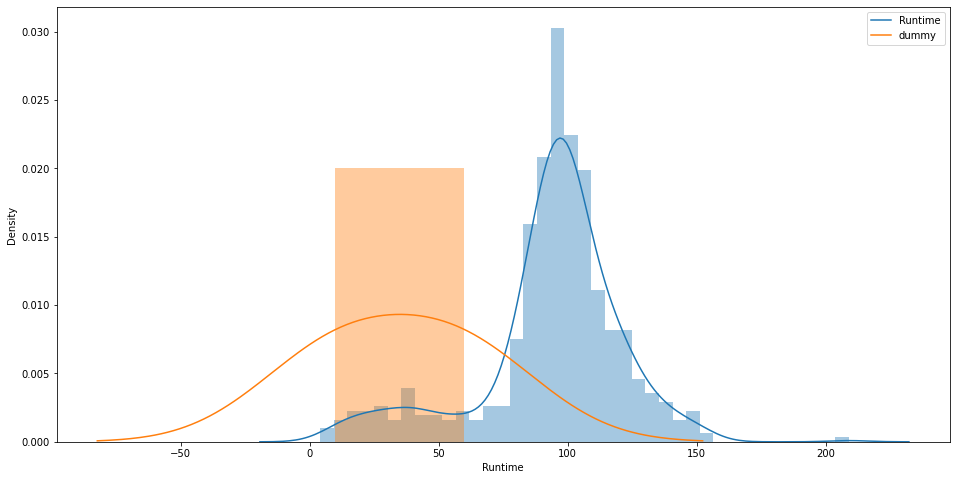

In [13]:
fig, ax = plt.subplots(1,1,figsize=(16, 8))
sns.distplot(data['Runtime'])
sns.distplot(dummy)
ax.legend(['Runtime', 'dummy'])
plt.show()

Null hypothesis is true : The mean of distribition is identical 
0.4585081948273481 0.6467570817311146




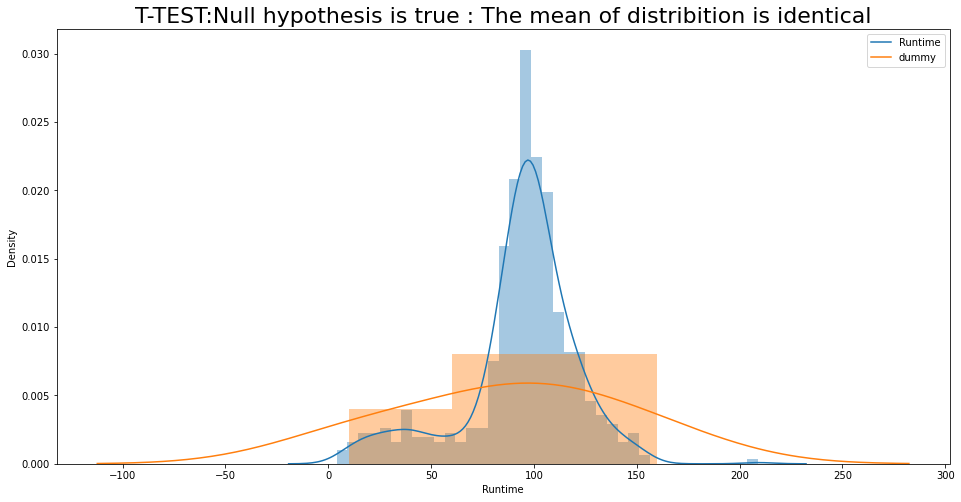

In [14]:
dummy = [10, 60, 99,110, 160]
test_result, pval = stats.ttest_ind(data['Runtime'], dummy)
if pval < 0.05: 
    print(f"WE  reject null hypothesis & Their is difference in mean of the sample distributions and  null hypothesis: {h_null}")
else: 
    print(f"Null hypothesis is true : The mean of distribition is identical ")
print(test_result, pval)
print()
print()
fig, ax = plt.subplots(1,1,figsize=(16, 8))
sns.distplot(data['Runtime'])
sns.distplot(dummy)
ax.legend(['Runtime', 'dummy'])
plt.title("T-TEST:Null hypothesis is true : The mean of distribition is identical", size=22)
plt.show()
#test_result, pval


<AxesSubplot:>

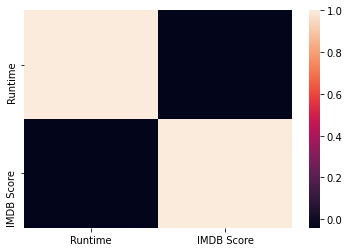

In [15]:
# CORRELATION ;
cor = data.corr()

sns.heatmap(cor)

#### T_Test